# Titanic Überlebensanalyse
DSCB230 WS2024/25

Gruppe | Studierende 1 | Studierende 2 | Studierende 3 |
------ | ------ | ------ | ------ |
`Alpha` | `gjle1011` | `roma1054` | `gema1060` |

## Case
Die RMS Titanic war ein britischer Passagierdampfer. In der Nacht vom 14. auf den 15. April 1912 kollidierte sie im Nordantlantik mit einem Eisberg auf ihrer Jungfernfahrt. Von den über 2220 Menschen an Board kamen 1514 Personen ums Leben.

> Source: https://de.wikipedia.org/wiki/Titanic_(Schiff)

Der von Kaggle gelistete [Datensatz der Titanic](https://www.kaggle.com/c/titanic) modelliert ein 'subset' von 891 Passagiere, der 2220 Menschen (~40.14%).

## Datenerfassung und Datenvorverarbeitung
### Analyse des Vorgegebenen Datensatzes
Der Header des Datensatzes zeigt diese Kategorien:
| Variable    | Definition                         | Key                                             | Note                                         |
|-------------|------------------------------------|-------------------------------------------------|----------------------------------------------|
| PassengerID | Ident. for each Passenger          |                                                 |                                              |
| Survived    | Has survived                       | 0 = No, 1 = Yes                                 |                                              |
| Pclass      | Ticket Class                       | 1 = 1st, 2 = 2nd, 3 = 3rd                       |                                              |
| Name        | Passenger Name                     |                                                 | "{surname},{gender_address} {name} {name_2}" |
| Sex         | Passenger Gender                   | male, female                                    |                                              |
| Age         | Passenger Age in Years             |                                                 |                                              |
| SibSp       | No. of Siblings/Spouses on Titanic |                                                 | type not specified                           |
| ParCh       | No. of Parents/Children on Titanic |                                                 | type not specified                           |
| Ticket      | Passenger Ticket Number            |                                                 |                                              |
| Fare        | Passenger Fare                     |                                                 | rounded to 4 digits                          |
| Cabin       | Passenger Cabin Number             |                                                 | "{deck}{room_no}"                            |
| Embarked    | Passenger Prot of Embarkation      | C = Cherbourg, Q = Queenstown, S = Southhampton |                                              |  

<br>

> Made with [Tables Generator](https://www.tablesgenerator.com/markdown_tables)

## Aufstellen der zu analysierenden Fragen
Wir möchten Herausfinden, ob nicht nur Glück für das Überleben der Passagiere an der Titanic verantwortlich ist. Wir erwarten, dass die Überlebensraten einzelner Gruppen höher sein werden als die der anderen. Mögliche Fragen dabei wären:
+ Sind die Überlebensraten vom Geschlecht der jeweiligen Passagiere abhängig?
+ Welche Altersgruppe hat die höchsten Überlebenschancen?
+ Ist die Überlebensrate abhängig von Ticketpreis?
+ Ist Familiengröße für die Überlebensrate von Bedeutung?
+ Bestätigt sich die Annahme: "Frauen und Kinder zuerst", oder kann der Ticketpreis wichtiger sein?

## Grundreinigung der Daten
### Nicht benötigte Daten
Nicht alle Daten im Datensatz werden für die folgenden Analysen benötigt, einige Daten fehlen.

Die für eine Überlebensanalyse nicht benötigten Daten sind:
+ PassengerID  
Es handelt sich um einen im nachhinein hinzugefügten Identifier und trägt keine Informationen zur Analyse bei.
+ Name  
Der Name ist ebenfalls unrelevant für eine Analyse, das Geschlecht der Personen ist bereits in einer anderen Spalte angegeben. Der Name lässt nicht auf weitere Werte schließen.
+ Ticket  
Die Ticketnummer ist nicht an die Raumzahl oder andere Parameter gekoppelt und daher irrelevant.
+ **Cabin**  
Da ein großer Teil der Passagiere im Datensatz keine Kabine zugewiesen hat, ist es ungenau Aussagen in den Zusammenhang mit der Kabine zu setzen.

### Behandeln von fehlenden Daten
+ Vorgehen beim fehlenden Alter  
Da die Löschung von Reihen verkleinert den Datensatz, besonders beim fehlenden Alter. Um den Datensatz dennoch analysieren zu können wird das Alter mit einem durchschnittlichen Alter basierend auf dem jeweiligen Geschlecht aufgefüllt.

### Beginn des Preprocessing:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read CSV into data frame
df = pd.read_csv('data/titanic.csv')

# Function to clean the data
def drop_columns(df):
    # Dropping unnecessary columns as declared in the notebook
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
    return df

# Function to fill missing values in Age column
def fill_age_missing_values(df):
    
    # Calculating the mean ages for each gender
    median_age_female = df[df['Sex'] == 'female']['Age'].median()
    median_age_male = df[df['Sex'] == 'male']['Age'].median()

    # Fill messing Age values based on the gender of the passenger
    df.loc[(df['Age'].isna()) & (df['Sex'] == 'female'), 'Age'] = median_age_female
    df.loc[(df['Age'].isna()) & (df['Sex'] == 'male'), 'Age'] = median_age_male

    # Rounding the age to nearest int
    df['Age'] = df['Age'].apply(np.floor)

    return df

# Apply functions for preprocessing
df = fill_age_missing_values(df)
df = drop_columns(df)

# Save the cleaned data to a new CSV file
df.to_csv('data/titanic_cleaned.csv', index=False)

## Beantworten der Fragestellungen

### Die allgemeine Überlebensrate der Titanic

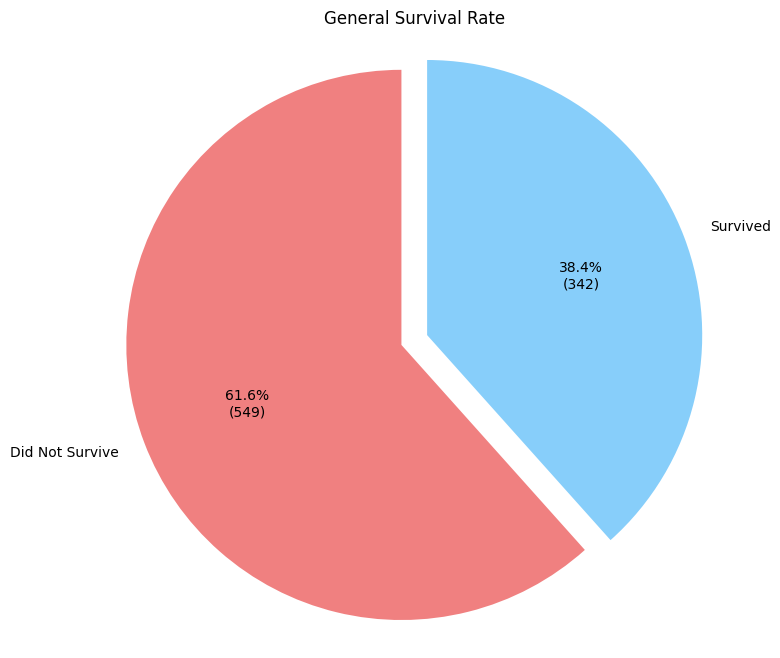

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('data/titanic_cleaned.csv')

def visualize_general_survival_rate(df):
        # Calculate the counts of survivors and non-survivors
    survival_counts = df['Survived'].value_counts()
    
    # Labels and sizes for the pie chart
    labels = ['Did Not Survive', 'Survived']
    sizes = [survival_counts[0], survival_counts[1]]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0, 0.1)  # "explode" the slice for survivors for emphasis
    
    # Function to format labels with absolute number and percentage
    def autopct_format(pct, allvals):
        absolute = int(round(pct/100.*sum(allvals)))
        return f'{pct:.1f}%\n({absolute})'
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes),
            startangle=90, explode=explode)
    plt.title('General Survival Rate')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Visualize the general survival rate
visualize_general_survival_rate(df)

Die allgemeine Überlebensrate liefert eine grundlegende Perspektive über das Außmaß der Tragödie der Titanic. Sie dient als Ausgangspunkt.

Eine niedrige Überlebensrate (38.4%) zeigt die Schwere der Katastrophe.

### Ist die Überlebensrate vom Geschlecht abhängig?
Informationen, die wir benötigen:
+ Anzahl der Überlebenden und Nicht-Überlebenden insgesamt
+ Anzahl der Überlebenden pro Geschlecht  
--> Berechnung der Überlebensrate pro Geschlecht

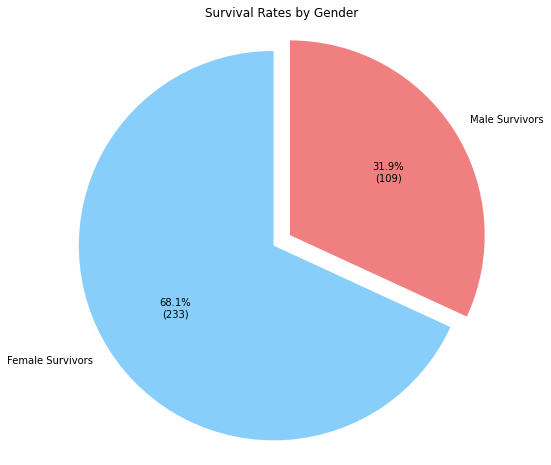

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the cleaned Titanic dataset
df = pd.read_csv('data/titanic_cleaned.csv')


def visualize_gender_survival_rates(df):
    # Calculate the total number of survivors by gender
    gender_survived_counts = df.groupby('Sex')['Survived'].sum()
    total_passengers_per_gender = df['Sex'].value_counts()
    
    # Prepare labels, sizes, and colors
    labels = ['Female Survivors', 'Male Survivors']
    sizes = [gender_survived_counts['female'], gender_survived_counts['male']]
    colors = ['lightskyblue', 'lightcoral']
    explode = (0.1, 0)  # "Explode" the female survivors slice for emphasis
    
    # Function to format labels with absolute number and percentage
    def autopct_format(pct, allvals):
        absolute = int(round(pct / 100. * sum(allvals)))
        return f'{pct:.1f}%\n({absolute})'
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes),
            startangle=90, explode=explode)
    plt.title('Survival Rates by Gender')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Call the function
visualize_gender_survival_rates(df)

Die Analyse nach dem Geschlecht zeigt Einblick in soziale Normen und Verhaltensweisen an Board.

Die Statistik legt nahe, dass das Prinzip "Frauen und Kinder zuerst" in der Evakuierung, zumindest Teilweise befolgt wurde. Erkennbar ist die wesentlich höhere Überlebensrate bei Frauen.

### Ist die Überlebensrate vom Alter abhängig?
Um die Überlebensrate in der Abhängigkeit vom Alter zu bestimmen, werden die Passagiere zuerst, zur besseren visualisierung, in Altersgruppen eingeteilt:  
| Group  | Range |
|--------|-------|
| infant | 0-6   |
| child  | 7-18  |
| teen   | 19-24 |
| adult  | 25-67 |
| senior | >67   |  

Legende: Range = Alter in Jahren

C:\Users\Maxi\AppData\Local\Temp/ipykernel_6924/3213756529.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
,  age_group_counts = df.groupby('AgeGroup')['Survived'].count()
,C:\Users\Maxi\AppData\Local\Temp/ipykernel_6924/3213756529.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
,  age_group_deaths = df.groupby('AgeGroup')['Survived'].apply(lambda x: (x == 0).sum())


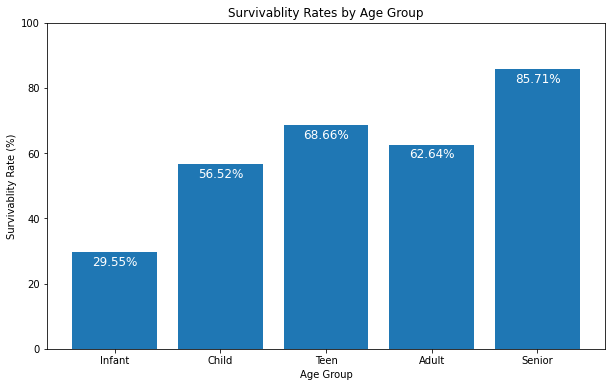

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned Titanic dataset
df = pd.read_csv('data/titanic_cleaned.csv')

def analyze_survivablity_by_age_group(df):
    # Define age groups
    bins = [0, 6, 18, 24, 67, float('inf')] # float('inf') is used to represent infinity, and cover all ages above 67
    labels = ['Infant', 'Child', 'Teen', 'Adult', 'Senior']
    
    # Create a new column 'AgeGroup' based on the defined bins and labels
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    
    # Calculate survivablity rate for each age group
    age_group_counts = df.groupby('AgeGroup')['Survived'].count()
    age_group_deaths = df.groupby('AgeGroup')['Survived'].apply(lambda x: (x == 0).sum())
    survivablity_rates = (age_group_deaths / age_group_counts) * 100
    
    # Plot the survivablity rates as a bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(survivablity_rates.index, survivablity_rates)
    plt.xlabel('Age Group')
    plt.ylabel('Survivablity Rate (%)')
    plt.title('Survivablity Rates by Age Group')
    plt.ylim(0, 100)
    
    # Add exact percentages on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, # Text alignment
                 f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=12, color='white') # Formatting
    
    plt.show()

analyze_survivablity_by_age_group(df)

Eine Analyse nah der Überlebensrate nach Altersgruppen bietet weiter Einblicke in die Dynamiken während der Katastrophe.

Kinder, insbesondere in niedrigeren Altergruppen zeigen eine niedrigere Überlebensrate im Vergleich zu Erwachsenen. Dies entspricht nicht der Annahme, dass Kinder in Krisensituationen priorisiert werden.
Mögliche Gründe können physische Einschränkungen oder eine niedrige Priorität sein.

### Ist die Überlebensrate von der Familiengröße abhängig?
Basierend auf der Berechneten Familiengröße, wird berechnet, ob eine größere/kleinere Familiengröße an Board die Überlebensrate beeinflusst.

posx and posy should be finite values
,posx and posy should be finite values
,posx and posy should be finite values
,posx and posy should be finite values


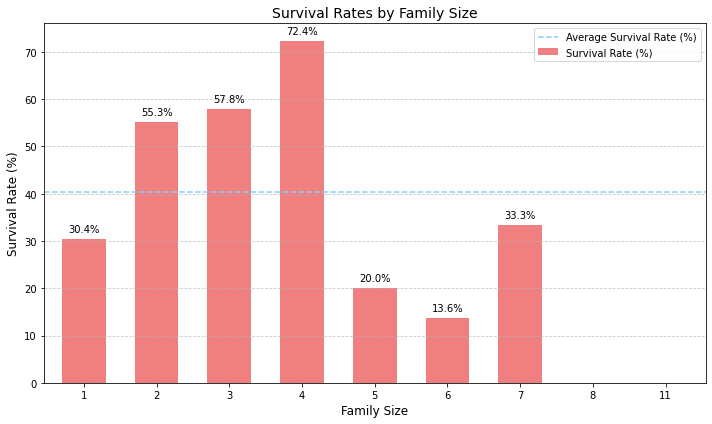

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv('data/titanic_cleaned.csv')

# Funktion zur Berechnung der Familiengröße
def calculate_family_size(row):
    return row['SibSp'] + row['ParCh'] + 1  # +1 für den Passagier selbst

# Anwendung der Funktion auf das DataFrame
df['FamilySize'] = df.apply(calculate_family_size, axis=1)

# Gruppenbildung und Zählen der Überlebenschancen
family_size_counts = df['FamilySize'].value_counts().sort_index()
survived_counts = df[df['Survived'] == 1]['FamilySize'].value_counts().sort_index()

# Berechnung der Überlebenschancen
survival_rates = (survived_counts / family_size_counts) * 100

# Durchschnittliche Überlebenschance berechnen
average_survival_rate = survival_rates.mean()

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar', color='lightcoral', width=0.6, label='Survival Rate (%)')

# Prozentzahlen über den Balken anzeigen
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)

# Durchschnittliche Überlebenschance als gestrichelte Linie hinzufügen
plt.axhline(y=average_survival_rate, color='lightskyblue', linestyle='--', label='Average Survival Rate (%)')

# Diagramm-Details
plt.title('Survival Rates by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()



Die Untersuchung der Familiengröße als Einflussfaktor auf die Überlebensrate bietet interessante Einblicke auf soziale Dynamiken und Verhaltensmuster.

Mittlere Familiengrößen haben die höchsten Überlebenschancen. Dies deutet darauf hin, dass kleine Gruppen effektiver Evakuiert werden konnten. Größere Familien (>= 5 Mitglieder) haben eine extrem geringe Überlebenswahrscheinlichkeit im Gegensatz zu anderen Familiengrößen.

Passagiere ohne Familie an Board zeigen jedoch auch tendenziell niedrigere Überlebensraten. Dies könnte an mangelnder Unterstützung oder niedrigere Priotität liegen.

Soziale Unterstützung hat die Überlebenschance erhöht.

### Ist die Überlebensrate vom Ticketpreis abhängig?

C:\Users\Maxi\AppData\Local\Temp/ipykernel_6924/2381693510.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
,  survived_counts = df[df['Survived'] == 1].groupby('FareCategory')['Survived'].count()


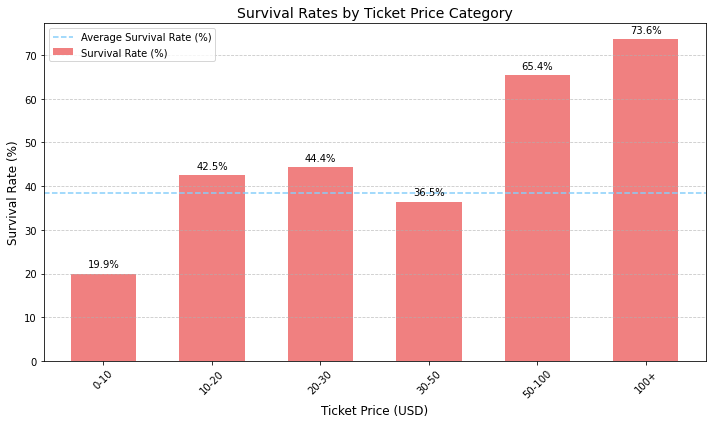

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv('data/titanic_cleaned.csv')

# Manuelles Erstellen von Preiskategorien
fare_bins = [0, 10, 20, 30, 50, 100, float('inf')]  # Letzte Kategorie offen
fare_labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '100+']

# Die Passagiere in die definierten Bins einteilen
df['FareCategory'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Berechnung der Überlebensraten
survived_counts = df[df['Survived'] == 1].groupby('FareCategory')['Survived'].count()
fare_counts = df['FareCategory'].value_counts().sort_index()
survival_rates = (survived_counts / fare_counts) * 100
average_survival_rate = df['Survived'].mean() * 100

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))

# Rote Balken: Überlebensraten
bars = survival_rates.plot(kind='bar', color='lightcoral', width=0.6, label='Survival Rate (%)')

# Prozentzahlen über den Balken anzeigen
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)

# Durchschnittliche Überlebensrate als gestrichelte Linie hinzufügen
plt.axhline(y=average_survival_rate, color='lightskyblue', linestyle='--', label='Average Survival Rate (%)')

# Diagramm-Details
plt.title('Survival Rates by Ticket Price Category', fontsize=14)
plt.xlabel('Ticket Price (USD)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()

Die Analyse des Ticketpreises als Faktor für die Überlebenswahrscheinlichkeit beleuchtet den möglichen Einfluss des sozioökonomischen Status auf die Überlebenschance.

Es lässt sich erkennen, dass höhere Ticketpreise mit höheren Überlebensraten korrelieren. Eine starke Klassendifferenz wird verdeutlicht.

## Frauen und Kinder zuerst?
Wir betrachten nun ob das Sprichwort "Frauen und Kinder zuerst!" in dem Falle der Titanic zutraf. Hierfür werden wir seperat die Kinder, Frauen und Männer betrachten.

Zunächst schauen wir ob "Kinder zuerst" zutrifft

Dataset loaded successfully.


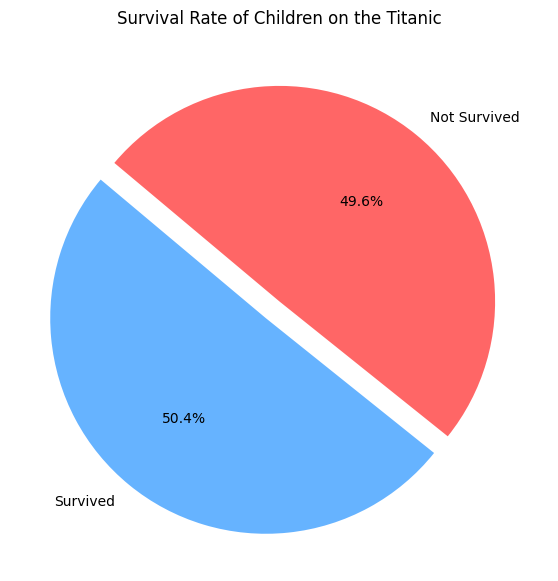

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset
file_path = 'data/titanic_cleaned.csv'  # Update with the correct path if needed

try:
    titanic_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Filter for children (age <= 18) and calculate survival counts directly using pandas
children_survival_counts = (
    titanic_data[titanic_data['Age'] <= 18]
    .groupby('Survived')
    .size()
    .reindex([1, 0], fill_value=0)
    .to_dict()
)

# Aggregate survival data
aggregated_children_survival = {
    'Survived': children_survival_counts.get(1, 0),
    'Not Survived': children_survival_counts.get(0, 0),
}

# Data for pie chart
labels = aggregated_children_survival.keys()
sizes = aggregated_children_survival.values()
colors = ['#66b3ff', '#ff6666']  # Custom colors for better visualization
explode = (0.1, 0)  # Only "explode" the Survived slice

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Survival Rate of Children on the Titanic')
plt.show()


Es zeigt sich, dass Kinder eine gleichverteile Überlebensrate haben. Damit kann die Aussage für Kinder nicht bestätigt werden. Sie wurden nicht priorisiert.

Wie sieht es bei den Frauen aus (Alter >=18)?

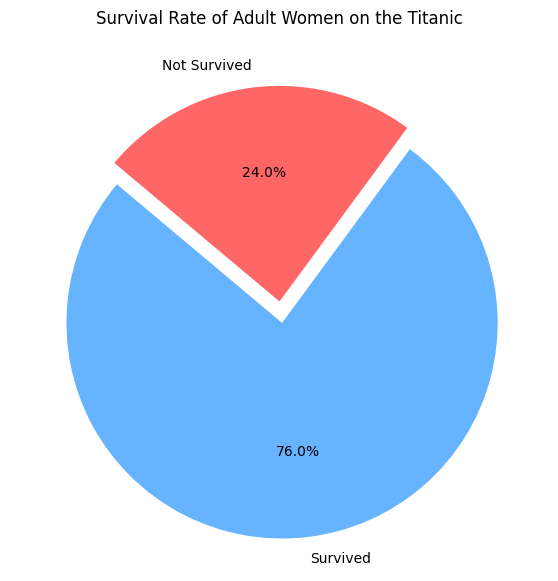

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the Titanic dataset
def load_titanic_data(filepath):
    try:
        titanic_data = pd.read_csv(filepath)
        return titanic_data
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None


titanic_data = load_titanic_data('data/titanic_cleaned.csv')

# Filter for adult women (age > 18)

adult_women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 18)]

# Count the number of survivors and non-survivors
survival_counts = adult_women['Survived'].value_counts().to_dict()

# Functional approach: Aggregate data and prepare labels for visualization
def aggregate_survival(survived_count_dict):
    return {
        'Survived': survived_count_dict.get(1, 0),
        'Not Survived': survived_count_dict.get(0, 0)
    }

# Apply aggregation
aggregated_survival = aggregate_survival(survival_counts)

# Data for pie chart
labels = aggregated_survival.keys()
sizes = aggregated_survival.values()
colors = ['#66b3ff', '#ff6666']  # Custom colors for better visualization
explode = (0.1, 0)  # Only "explode" the Survived slice

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Survival Rate of Adult Women on the Titanic')
plt.show()


Die Analyse zeigt, das Frauen (>= 18 Jahre) wiederrum eine höhere Überlebensrate haben.

Final betrachten wir nun die Männer(Alter >=18)

Dataset loaded successfully.


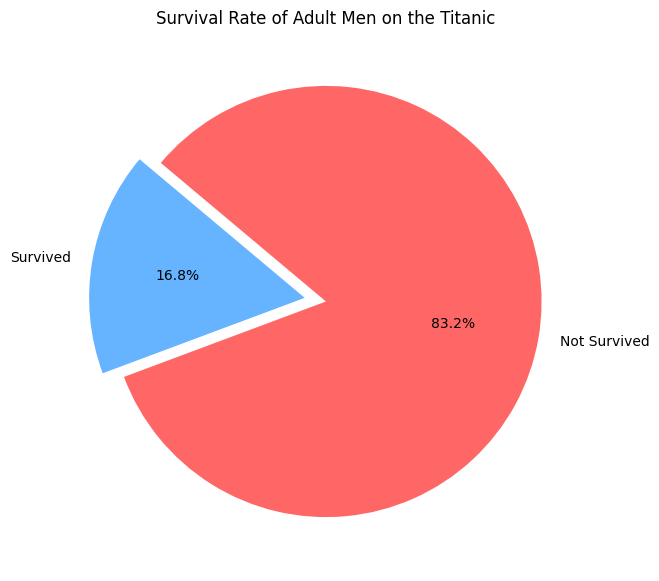

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset
file_path = 'data/titanic_cleaned.csv'  # Update with the correct path if needed

try:
    titanic_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Filter for adult men (age > 18) and calculate survival counts directly using pandas
adult_men_survival_counts = (
    titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Age'] > 18)]
    .groupby('Survived')
    .size()
    .reindex([1, 0], fill_value=0)
    .to_dict()
)

# Aggregate survival data
aggregated_adult_men_survival = {
    'Survived': adult_men_survival_counts.get(1, 0),
    'Not Survived': adult_men_survival_counts.get(0, 0),
}

# Data for pie chart
labels = aggregated_adult_men_survival.keys()
sizes = aggregated_adult_men_survival.values()
colors = ['#66b3ff', '#ff6666']  # Custom colors for better visualization
explode = (0.1, 0)  # Only "explode" the Survived slice

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Survival Rate of Adult Men on the Titanic')
plt.show()


Eine extrem niedrigere Überlebensrate der Männer (>= 18 Jahre) zeigt, dass das Sprichwort "Frauen und Kinder zuerst" zutrifft.

Verwunderlich ist jedoch die hohe Sterblichkeitsrate bei Kindern.

Spekulation:
        Es kann diverse Gründe geben, warum die Überlebensrate der Kinder niedriger ist als jene der Frauen:
        z.B. schliefen die allermeisten Kinder vor der Kollision mit dem Eisberg und vermutlich waren nicht wenige Eltern wärenddessen außerhalb der Kabine.
        Im ausgebrochenen Tumult wird es den Eltern schwer gefallen sein, ihre Kinder wiederzufinden und sie auf die Rettungsboote zu verbringen. 
        Ebenfalls ist es möglich, dass einige Kinder die es auf die Rettungsboote schafften, die widrigen Bedingungen auf dem offenen Meer bis zur finalen Rettung durch die "Carpathia"
        nicht überlebten.

## Lessons Learned

### Die Datenqualität ist entscheidend
Die Qualität und Vollständigkeit der Daten bestimmt maßgeblich die Aussagekraft der Analyse.
Fehlende oder unvollständige Daten (z. B. Altersangaben oder Kabinennummern) können die Analyse einschränken. Strategien wie das Imputieren von Mittelwerten oder der gezielte Ausschluss irrelevanter Daten sind essenziell.
Die Datenbereinigung sollte daher strukturiert erfolgen und mögliche Verzerrungen durch die Imputation müssen berücksichtigt werden.

### Interdisziplinäre Ansätze sind notwendig für eine bessere Analyse
Historische, soziologische und mathematische Perspektiven müssen kombiniert werden, um die Ergebnisse zu interpretieren. 
Eine reine Datenanalyse liefert Zahlen, aber erst durch den Kontext wird klar, warum Frauen und Kinder höhere Überlebensraten hatten oder warum der Ticketpreis ein signifikanter Faktor war.
Die Einbindung von Fachwissen aus verschiedenen Bereichen (Domänenwissen) verbessert die Analyse.

### Die richtige Fragestellung bestimmt den Erfolg
Eine klare Definition von Hypothesen und Fragestellungen ist essenziell, um die Analyse zielführend zu gestalten.
Die Titanic-Datenanalyse zeigt, dass vage Fragen wie „Wer hat überlebt?“ weniger zielführend sind als präzise formulierte Hypothesen wie „War der Ticketpreis ein signifikanter Faktor für das Überleben?“.
Der Fokus sollte auf Hypothesen mit klaren Ergebnissen und Implikationen liegen.

### Soziale und ethische Implikationen
Daten sind nie nur Zahlen – sie repräsentieren Menschen, Ereignisse und Entscheidungen.
Die Analyse der Titanic-Daten zeigt, wie stark gesellschaftliche Normen (z. B. „Frauen und Kinder zuerst“) die Ergebnisse beeinflusst haben. Die Menschen an Board befanden sich in einer Ausnahmesituation.Solche Aspekte müssen immer berücksichtigt werden.
Jede Analyse sollte sich der ethischen und sozialen Dimensionen bewusst sein und diese aktiv einbeziehen.

### Kommunikation und Organisation
Die Organisation der Dokumente über git (GitHub) machte das gemeinsame Arbeiten am Projekt einfach. Aufgabenstellungen wurden über Issues verteilt. Die Aufteilung war klar und das Projekt strukturiert.